# Accuracy Validation

In this notebook, the main goal is to validate the accuracy of the models using 5-fold cross validation. This step is to prove if the model has a great accuracy on the training dataset. Besides that, cross validation can also help to check if the models overfit the training dataset.  

In [10]:
# import all of the packages that will be used

# basic packages for data processing
import pandas as pd
import numpy as np

# packages for machine learning
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# packages to interpret the training result
import matplotlib.pyplot as plt
%matplotlib inline

# silent the warning from sklearn package
import warnings
warnings.filterwarnings('ignore')

# set the random seed to ensure the result is reproducible
import random
random.seed(10)
np.random.seed(10)

In [11]:
features = pd.read_csv('Dataset/features_selected/LUFlow_RandomForestClassifier_11.csv').squeeze()
features = features[:6]

## Load the dataset

In this notebook, only the training dataset is used. 

In [12]:
columns = features.tolist() +  ['label']

luflow_2020 = pd.read_csv('Dataset/dataset_cleaned/LUFlow.csv', usecols=columns)
luflow_2020.shape

(1759480, 7)

## Additional Processing

In [13]:
luflow_2020 = luflow_2020.sample(frac=0.3).reset_index(drop=True)

### Split the features and the labels

In [14]:
luflow_2020_X = luflow_2020.drop('label', axis=1).copy()
luflow_2020_y = luflow_2020['label'].copy()

### Data scaling

In [15]:
scalar = StandardScaler()
# only fit the training data
luflow_2020_X_scaled = scalar.fit_transform(luflow_2020_X)

## Build the ultimate models

Build the models with optimal hyperparameters. 

In [16]:
# define the models with optimal hyperparameter retrived in Step 3
models = {
    'Decision Tree': tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.00013808459751681997),
    'Random Forest': RandomForestClassifier(n_jobs=-1,criterion='gini', max_depth=10, min_samples_leaf=0.00005, min_samples_split=12, n_estimators=300),
    'Support Vector Machine': SVC(C=100, gamma=1, kernel='rbf'),
    'Naive Bayes': GaussianNB(var_smoothing=8.111308307896873e-06),
    'Artificial Neural Network': MLPClassifier(hidden_layer_sizes=(40,), activation='relu', solver='adam', alpha=0.001, max_iter=500),
    'Deep Neural Network': MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='tanh', solver='adam', alpha=1e-05, max_iter=500)
}

In [17]:
accuracy_scores = {}
accuracy_scores_mean = {}
accuracy_scores_std = {}

cv = StratifiedKFold(n_splits=5, shuffle=True)

for model in models:
    clf = models[model]
    
    accuracy_scores[model] = cross_val_score(clf, 
                                            luflow_2020_X_scaled, 
                                            luflow_2020_y, 
                                            cv=cv, 
                                            scoring='accuracy',
                                            n_jobs=-1)
    accuracy_scores_mean[model] = np.mean(accuracy_scores[model])
    accuracy_scores_std[model] = np.std(accuracy_scores[model])

    print(f"{'-'*25} {model} {'-'*25}")
    print(f"Accuracy: {accuracy_scores[model]}")
    print(f"mean: {accuracy_scores_mean[model]:.4f}\t\tstd: {accuracy_scores_std[model]:.4f}")

------------------------- Decision Tree -------------------------
Accuracy: [0.9994506  0.99927062 0.99937482 0.99944112 0.99947901]
mean: 0.9994		std: 0.0001
------------------------- Random Forest -------------------------
Accuracy: [0.99947901 0.99939376 0.99948849 0.99955479 0.99950743]
mean: 0.9995		std: 0.0001
------------------------- Support Vector Machine -------------------------
Accuracy: [0.9961447  0.99604998 0.9962489  0.99560477 0.99543422]
mean: 0.9959		std: 0.0003
------------------------- Naive Bayes -------------------------
Accuracy: [0.72010723 0.71536152 0.72096922 0.72336576 0.71898681]
mean: 0.7198		std: 0.0026
------------------------- Artificial Neural Network -------------------------
Accuracy: [0.9953206  0.99603103 0.99587    0.99562372 0.99524477]
mean: 0.9956		std: 0.0003
------------------------- Deep Neural Network -------------------------
Accuracy: [0.99842757 0.9983139  0.99826654 0.99867385 0.99856017]
mean: 0.9984		std: 0.0002


## Accuracy score of each model

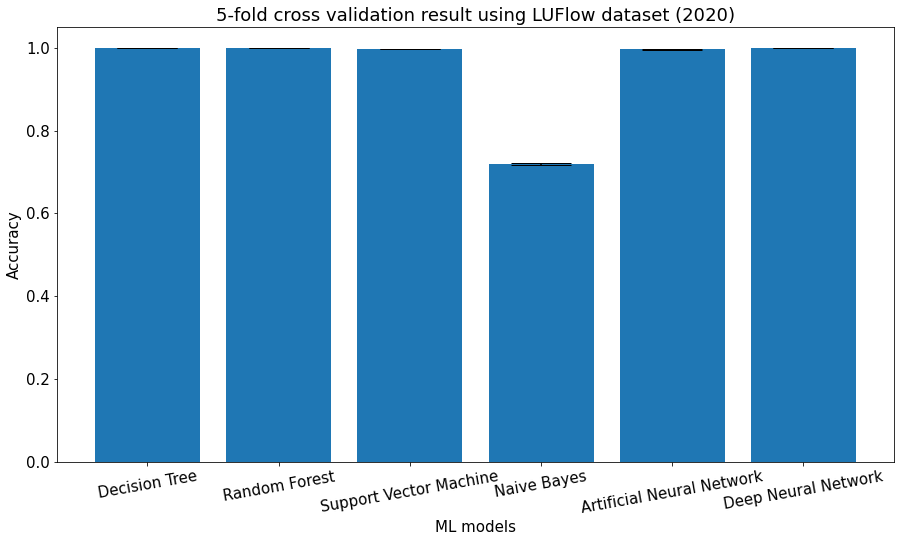

In [18]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize= (15, 8))

# ax.boxplot(accuracy_scores.values())
ax.bar(accuracy_scores_mean.keys(),
        accuracy_scores_mean.values(),
        yerr=accuracy_scores_std.values(),
        capsize=30)
ax.set_xlabel('ML models')
ax.set_ylabel('Accuracy')
ax.set_title('5-fold cross validation result using LUFlow dataset (2020)')
plt.setp(ax.get_xticklabels(), rotation=10, horizontalalignment='center') # rotate the label

plt.show()